In [ ]:
import numpy as np 
import pandas as pd 
import ast
import seaborn as sns

In [ ]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv') 

In [ ]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [ ]:
movies.shape

(4803, 20)

In [ ]:
credits.head()

In [ ]:
credits.shape

(4803, 4)

In [ ]:
movies = movies.merge(credits,on='title')

In [ ]:
movies.head(1)

In [ ]:
sns.lineplot(movies['budget'],movies['revenue'])

In [ ]:
sns.barplot(x="vote_average",y="vote_count",data=movies)

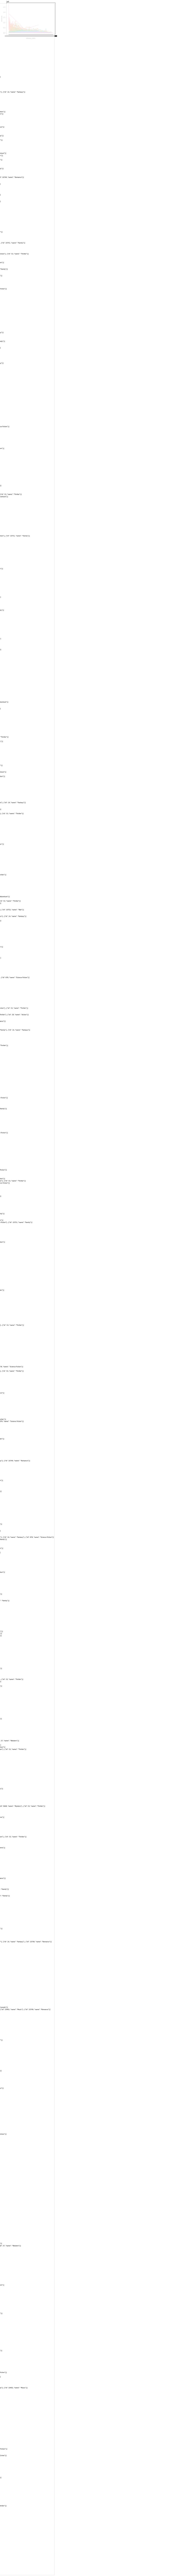

In [ ]:
sns.lineplot(x="release_date",y="revenue",hue="genres",data=movies)

In [ ]:
movies.head(1)

In [ ]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew']]

In [ ]:
movies.head()

In [ ]:
def convert(text):
    L = []
    for i in ast.literal_eval(text):
        L.append(i['name']) 
    return L 

In [ ]:
movies.dropna(inplace=True)

In [ ]:
movies['genres'] = movies['genres'].apply(convert)

In [ ]:
movies.head()

In [ ]:
movies['cast'] = movies['cast'].apply(lambda x:x[0:3])

In [ ]:
def fetch_director(text):
    L = []
    for i in ast.literal_eval(text):
        if i['job'] == 'Director':
            L.append(i['name'])
    return L 

In [ ]:
movies['crew'] = movies['crew'].apply(fetch_director)

In [ ]:
movies.sample(5)

In [ ]:
def collapse(L):
    L1 = []
    for i in L:
        L1.append(i.replace(" ",""))
    return L1

In [ ]:
movies['cast'] = movies['cast'].apply(collapse)
movies['crew'] = movies['crew'].apply(collapse)
movies['genres'] = movies['genres'].apply(collapse)
movies['keywords'] = movies['keywords'].apply(collapse)


In [ ]:
movies.head()

In [ ]:
movies['overview'] = movies['overview'].apply(lambda x:x.split())


In [ ]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [ ]:
new = movies.drop(columns=['overview','genres','keywords','cast','crew'])
#new.head()

In [ ]:
new['tags'] = new['tags'].apply(lambda x: " ".join(x))
new.head()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')
    

In [ ]:
vector = cv.fit_transform(new['tags']).toarray()

In [ ]:
vector.shape

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vector)

In [ ]:
similarity

In [ ]:
new[new['title'] == 'The Lego Movie'].index[0]

744

In [ ]:
def recommend(movie):
    index = new[new['title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new.iloc[i[0]].title)


In [ ]:
recommend('Batman')

Batman
The Dark Knight Rises
Batman & Robin
Batman Begins
Amidst the Devil's Wings


In [ ]:
recommend('Batman')

Batman
The Dark Knight Rises
Batman & Robin
Batman Begins
Amidst the Devil's Wings


In [ ]:
recommend('The Avengers')

Allegiant
Avengers: Age of Ultron
The Blood of Heroes
Team America: World Police
The Helix... Loaded


In [ ]:
import pickle
pickle.dump(new,open('movie_list.pkl','wb'))
pickle.dump(similarity,open('similarity.pkl','wb'))
 